In [22]:
import pandas as pd
import numpy as np
import prophet as ph
import random
import matplotlib.pyplot as plt
import pickle

## =============================================== DATA SET ===================================================##

# 엑셀파일에서 데이터 가져오기.
file_path = 'D:\Git\Predict_workload\Dataset.xlsx'
columns_to_select = ['ITEM_CODE', 'PRODUCT_WPNL', 'CLOCK_ACCEPT', 'RECIPE']

df = pd.read_excel(file_path, usecols=columns_to_select)

print(df)

# 레시피별 시간 소요 추가 (단위는 임시로 분으로 함)
recipe_time = {'A': 9, 'B': 6, 'C': 4}

def calculate_total_time(row):
    recipe = row['RECIPE']
    panel_count = row['PRODUCT_WPNL']
    return panel_count * recipe_time[recipe]

# 총 소요 시간 계산
df['Total_Time'] = df.apply(calculate_total_time, axis=1)

print(df.head())


         ITEM_CODE  PRODUCT_WPNL        CLOCK_ACCEPT RECIPE
0      MCP22325A00            59 2023-12-31 11:09:00      A
1      MCP19381I00            57 2024-01-01 00:11:56      B
2      EMC01362A00            60 2023-12-31 04:57:58      C
3      MCP21691A00            39 2023-12-31 22:29:59      A
4      MCP18135B00            60 2024-01-01 02:00:32      B
...            ...           ...                 ...    ...
17843  MCP20417D00            60 2024-05-07 20:56:37      C
17844  MCP20417D00            68 2024-05-07 21:00:12      A
17845  MCP21628C00            69 2024-05-07 20:50:47      B
17846  MCP20967A00            15 2024-05-07 19:05:03      C
17847  MCP20967A00            18 2024-05-07 19:12:32      A

[17848 rows x 4 columns]
     ITEM_CODE  PRODUCT_WPNL        CLOCK_ACCEPT RECIPE  Total_Time
0  MCP22325A00            59 2023-12-31 11:09:00      A         531
1  MCP19381I00            57 2024-01-01 00:11:56      B         342
2  EMC01362A00            60 2023-12-31 04:57:58  

In [23]:
## =============================================== CODE별 소요시간 예측 특징 추출 ===================================================##

# 날짜를 datatime 형식으로 변환
df['CLOCK_ACCEPT'] = pd.to_datetime(df['CLOCK_ACCEPT'])

# ITEM별로 데이터를 그룹화
grouped = df.groupby('ITEM_CODE')

# 각 ITEM에 대해 Prophet 모델을 학습하고 예측
models = {}
forecasts = {}
all_forecasts = pd.DataFrame()

for item, data in grouped:
    # Prophet 모델을 위한 데이터 준비
    df_prophet = data[['CLOCK_ACCEPT', 'Total_Time']].rename(columns={'CLOCK_ACCEPT': 'ds', 'Total_Time': 'y'})
    
    # DataFrame 내에 NaN 값이 있어서 계속 오류남. NaN 값이 도출 될 경우 무시하도록 수정
    # NaN값이 생기는 이유는 학습을 위한 최소 행 조건 미달이라서 생김. 
    # 해당 ITEM은 Excel 파일 내에 행이 하나라서 학습이 안되는듯...?
    
    if df_prophet.dropna().shape[0] > 1:
        # Prophet 모델 학습
        model = ph.Prophet()
        model.fit(df_prophet)
        #models[item] = model

        ## 미래 데이터 프레임 생성 (다음 예측)
        #future = model.make_future_dataframe(periods=30, freq='D')
        #forecast = model.predict(future)
        #forecasts[item] = forecast
        #
        # # 예측 데이터에 ITEM 정보 추가
        #forecast['ITEM_CODE'] = item
        #all_forecasts = pd.concat([all_forecasts, forecast], ignore_index=True)

        ## 예측 결과 시각화
        #fig, ax = plt.subplots(figsize=(10, 6))
        #model.plot(forecast, ax=ax)
        #ax.set_title(f'ITEM_CODE: {item}')
        #ax.set_xlabel('Date')
        #ax.set_ylabel('Total Production Time')
        #plt.show()
    else:
        print(f"Skipping {item} due to insufficient data")

with open('D:\Git\Predict_workload\prophet_model.pkl', 'wb') as f:
    pickle.dump(model, f)
    

15:43:28 - cmdstanpy - INFO - Chain [1] start processing
15:43:28 - cmdstanpy - INFO - Chain [1] done processing
15:43:28 - cmdstanpy - INFO - Chain [1] start processing
15:43:28 - cmdstanpy - INFO - Chain [1] done processing
15:43:28 - cmdstanpy - INFO - Chain [1] start processing
15:43:28 - cmdstanpy - INFO - Chain [1] done processing
15:43:28 - cmdstanpy - INFO - Chain [1] start processing
15:43:30 - cmdstanpy - INFO - Chain [1] done processing
15:43:30 - cmdstanpy - INFO - Chain [1] start processing
15:43:30 - cmdstanpy - INFO - Chain [1] done processing
15:43:31 - cmdstanpy - INFO - Chain [1] start processing
15:43:31 - cmdstanpy - INFO - Chain [1] done processing
15:43:31 - cmdstanpy - INFO - Chain [1] start processing
15:43:31 - cmdstanpy - INFO - Chain [1] done processing
15:43:31 - cmdstanpy - INFO - Chain [1] start processing
15:43:31 - cmdstanpy - INFO - Chain [1] done processing
15:43:31 - cmdstanpy - INFO - Chain [1] start processing
15:43:31 - cmdstanpy - INFO - Chain [1]

Skipping BOC04623B00 due to insufficient data


15:43:33 - cmdstanpy - INFO - Chain [1] start processing
15:43:38 - cmdstanpy - INFO - Chain [1] done processing
15:43:38 - cmdstanpy - INFO - Chain [1] start processing
15:43:38 - cmdstanpy - INFO - Chain [1] done processing
15:43:38 - cmdstanpy - INFO - Chain [1] start processing
15:43:38 - cmdstanpy - INFO - Chain [1] done processing
15:43:38 - cmdstanpy - INFO - Chain [1] start processing
15:43:38 - cmdstanpy - INFO - Chain [1] done processing
15:43:38 - cmdstanpy - INFO - Chain [1] start processing
15:43:38 - cmdstanpy - INFO - Chain [1] done processing
15:43:38 - cmdstanpy - INFO - Chain [1] start processing
15:43:39 - cmdstanpy - INFO - Chain [1] done processing
15:43:39 - cmdstanpy - INFO - Chain [1] start processing


Skipping BOC04881A00 due to insufficient data


15:43:39 - cmdstanpy - INFO - Chain [1] done processing
15:43:39 - cmdstanpy - INFO - Chain [1] start processing
15:43:39 - cmdstanpy - INFO - Chain [1] done processing
15:43:39 - cmdstanpy - INFO - Chain [1] start processing
15:43:39 - cmdstanpy - INFO - Chain [1] done processing
15:43:39 - cmdstanpy - INFO - Chain [1] start processing
15:43:39 - cmdstanpy - INFO - Chain [1] done processing
15:43:39 - cmdstanpy - INFO - Chain [1] start processing
15:43:39 - cmdstanpy - INFO - Chain [1] done processing
15:43:39 - cmdstanpy - INFO - Chain [1] start processing
15:43:40 - cmdstanpy - INFO - Chain [1] done processing
15:43:40 - cmdstanpy - INFO - Chain [1] start processing
15:43:40 - cmdstanpy - INFO - Chain [1] done processing
15:43:40 - cmdstanpy - INFO - Chain [1] start processing
15:43:40 - cmdstanpy - INFO - Chain [1] done processing
15:43:40 - cmdstanpy - INFO - Chain [1] start processing
15:43:40 - cmdstanpy - INFO - Chain [1] done processing
15:43:40 - cmdstanpy - INFO - Chain [1] 

Skipping EMC01049C00 due to insufficient data


15:43:53 - cmdstanpy - INFO - Chain [1] done processing
15:43:53 - cmdstanpy - INFO - Chain [1] start processing
15:43:53 - cmdstanpy - INFO - Chain [1] done processing
15:43:53 - cmdstanpy - INFO - Chain [1] start processing
15:43:53 - cmdstanpy - INFO - Chain [1] done processing
15:43:53 - cmdstanpy - INFO - Chain [1] start processing
15:43:53 - cmdstanpy - INFO - Chain [1] done processing
15:43:54 - cmdstanpy - INFO - Chain [1] start processing
15:43:54 - cmdstanpy - INFO - Chain [1] done processing
15:43:54 - cmdstanpy - INFO - Chain [1] start processing
15:43:54 - cmdstanpy - INFO - Chain [1] done processing
15:43:54 - cmdstanpy - INFO - Chain [1] start processing
15:43:54 - cmdstanpy - INFO - Chain [1] done processing
15:43:54 - cmdstanpy - INFO - Chain [1] start processing
15:43:54 - cmdstanpy - INFO - Chain [1] done processing
15:43:54 - cmdstanpy - INFO - Chain [1] start processing
15:43:54 - cmdstanpy - INFO - Chain [1] done processing
15:43:54 - cmdstanpy - INFO - Chain [1] 

Skipping FLC10678A00 due to insufficient data


15:44:36 - cmdstanpy - INFO - Chain [1] done processing
15:44:36 - cmdstanpy - INFO - Chain [1] start processing
15:44:36 - cmdstanpy - INFO - Chain [1] done processing
15:44:36 - cmdstanpy - INFO - Chain [1] start processing
15:44:37 - cmdstanpy - INFO - Chain [1] done processing
15:44:37 - cmdstanpy - INFO - Chain [1] start processing
15:44:37 - cmdstanpy - INFO - Chain [1] done processing
15:44:37 - cmdstanpy - INFO - Chain [1] start processing
15:44:37 - cmdstanpy - INFO - Chain [1] done processing
15:44:37 - cmdstanpy - INFO - Chain [1] start processing
15:44:42 - cmdstanpy - INFO - Chain [1] done processing
15:44:43 - cmdstanpy - INFO - Chain [1] start processing
15:44:43 - cmdstanpy - INFO - Chain [1] done processing
15:44:43 - cmdstanpy - INFO - Chain [1] start processing
15:44:43 - cmdstanpy - INFO - Chain [1] done processing
15:44:43 - cmdstanpy - INFO - Chain [1] start processing
15:44:43 - cmdstanpy - INFO - Chain [1] done processing
15:44:43 - cmdstanpy - INFO - Chain [1] 

Skipping FLC11630A00 due to insufficient data
Skipping FLC11641A00 due to insufficient data


15:44:44 - cmdstanpy - INFO - Chain [1] done processing
15:44:44 - cmdstanpy - INFO - Chain [1] start processing


Skipping FLC11687A00 due to insufficient data


15:44:45 - cmdstanpy - INFO - Chain [1] done processing
15:44:46 - cmdstanpy - INFO - Chain [1] start processing
15:44:46 - cmdstanpy - INFO - Chain [1] done processing
15:44:46 - cmdstanpy - INFO - Chain [1] start processing
15:44:46 - cmdstanpy - INFO - Chain [1] done processing
15:44:46 - cmdstanpy - INFO - Chain [1] start processing
15:44:46 - cmdstanpy - INFO - Chain [1] done processing


Skipping MCP05432A00 due to insufficient data
Skipping MCP06092A00 due to insufficient data


15:44:46 - cmdstanpy - INFO - Chain [1] start processing
15:44:46 - cmdstanpy - INFO - Chain [1] done processing
15:44:46 - cmdstanpy - INFO - Chain [1] start processing
15:44:49 - cmdstanpy - INFO - Chain [1] done processing
15:44:50 - cmdstanpy - INFO - Chain [1] start processing


Skipping MCP08393B00 due to insufficient data
Skipping MCP08644A00 due to insufficient data


15:44:50 - cmdstanpy - INFO - Chain [1] done processing
15:44:50 - cmdstanpy - INFO - Chain [1] start processing
15:44:51 - cmdstanpy - INFO - Chain [1] done processing
15:44:51 - cmdstanpy - INFO - Chain [1] start processing


Skipping MCP10598C00 due to insufficient data


15:44:52 - cmdstanpy - INFO - Chain [1] done processing
15:44:53 - cmdstanpy - INFO - Chain [1] start processing
15:44:53 - cmdstanpy - INFO - Chain [1] done processing
15:44:53 - cmdstanpy - INFO - Chain [1] start processing


Skipping MCP11085B00 due to insufficient data


15:44:53 - cmdstanpy - INFO - Chain [1] done processing
15:44:53 - cmdstanpy - INFO - Chain [1] start processing
15:44:53 - cmdstanpy - INFO - Chain [1] done processing
15:44:54 - cmdstanpy - INFO - Chain [1] start processing
15:44:57 - cmdstanpy - INFO - Chain [1] done processing
15:44:57 - cmdstanpy - INFO - Chain [1] start processing
15:44:57 - cmdstanpy - INFO - Chain [1] done processing
15:44:57 - cmdstanpy - INFO - Chain [1] start processing


Skipping MCP11959D00 due to insufficient data


15:44:57 - cmdstanpy - INFO - Chain [1] done processing
15:44:57 - cmdstanpy - INFO - Chain [1] start processing
15:45:06 - cmdstanpy - INFO - Chain [1] done processing
15:45:06 - cmdstanpy - INFO - Chain [1] start processing
15:45:07 - cmdstanpy - INFO - Chain [1] done processing
15:45:07 - cmdstanpy - INFO - Chain [1] start processing


Skipping MCP12158A00 due to insufficient data


15:45:07 - cmdstanpy - INFO - Chain [1] done processing
15:45:08 - cmdstanpy - INFO - Chain [1] start processing
15:45:08 - cmdstanpy - INFO - Chain [1] done processing
15:45:08 - cmdstanpy - INFO - Chain [1] start processing
15:45:08 - cmdstanpy - INFO - Chain [1] done processing
15:45:08 - cmdstanpy - INFO - Chain [1] start processing
15:45:08 - cmdstanpy - INFO - Chain [1] done processing
15:45:08 - cmdstanpy - INFO - Chain [1] start processing
15:45:09 - cmdstanpy - INFO - Chain [1] done processing
15:45:09 - cmdstanpy - INFO - Chain [1] start processing
15:45:09 - cmdstanpy - INFO - Chain [1] done processing
15:45:09 - cmdstanpy - INFO - Chain [1] start processing
15:45:11 - cmdstanpy - INFO - Chain [1] done processing
15:45:11 - cmdstanpy - INFO - Chain [1] start processing
15:45:12 - cmdstanpy - INFO - Chain [1] done processing
15:45:12 - cmdstanpy - INFO - Chain [1] start processing
15:45:12 - cmdstanpy - INFO - Chain [1] done processing
15:45:12 - cmdstanpy - INFO - Chain [1] 

Skipping MCP14803A00 due to insufficient data


15:45:23 - cmdstanpy - INFO - Chain [1] start processing
15:45:24 - cmdstanpy - INFO - Chain [1] done processing
15:45:24 - cmdstanpy - INFO - Chain [1] start processing
15:45:24 - cmdstanpy - INFO - Chain [1] done processing
15:45:24 - cmdstanpy - INFO - Chain [1] start processing
15:45:24 - cmdstanpy - INFO - Chain [1] done processing
15:45:24 - cmdstanpy - INFO - Chain [1] start processing
15:45:24 - cmdstanpy - INFO - Chain [1] done processing
15:45:25 - cmdstanpy - INFO - Chain [1] start processing
15:45:25 - cmdstanpy - INFO - Chain [1] done processing
15:45:25 - cmdstanpy - INFO - Chain [1] start processing
15:45:25 - cmdstanpy - INFO - Chain [1] done processing
15:45:25 - cmdstanpy - INFO - Chain [1] start processing
15:45:25 - cmdstanpy - INFO - Chain [1] done processing
15:45:25 - cmdstanpy - INFO - Chain [1] start processing
15:45:32 - cmdstanpy - INFO - Chain [1] done processing
15:45:32 - cmdstanpy - INFO - Chain [1] start processing
15:45:33 - cmdstanpy - INFO - Chain [1]

Skipping MCP15964C00 due to insufficient data
Skipping MCP15965C00 due to insufficient data


15:45:33 - cmdstanpy - INFO - Chain [1] start processing
15:45:33 - cmdstanpy - INFO - Chain [1] done processing
15:45:34 - cmdstanpy - INFO - Chain [1] start processing
15:45:34 - cmdstanpy - INFO - Chain [1] done processing
15:45:35 - cmdstanpy - INFO - Chain [1] start processing
15:45:35 - cmdstanpy - INFO - Chain [1] done processing
15:45:35 - cmdstanpy - INFO - Chain [1] start processing
15:45:35 - cmdstanpy - INFO - Chain [1] done processing
15:45:35 - cmdstanpy - INFO - Chain [1] start processing
15:45:36 - cmdstanpy - INFO - Chain [1] done processing


Skipping MCP16729B00 due to insufficient data


15:45:36 - cmdstanpy - INFO - Chain [1] start processing
15:45:36 - cmdstanpy - INFO - Chain [1] done processing
15:45:36 - cmdstanpy - INFO - Chain [1] start processing
15:45:37 - cmdstanpy - INFO - Chain [1] done processing
15:45:37 - cmdstanpy - INFO - Chain [1] start processing
15:45:37 - cmdstanpy - INFO - Chain [1] done processing
15:45:37 - cmdstanpy - INFO - Chain [1] start processing
15:45:37 - cmdstanpy - INFO - Chain [1] done processing
15:45:38 - cmdstanpy - INFO - Chain [1] start processing
15:45:38 - cmdstanpy - INFO - Chain [1] done processing
15:45:38 - cmdstanpy - INFO - Chain [1] start processing
15:45:38 - cmdstanpy - INFO - Chain [1] done processing
15:45:38 - cmdstanpy - INFO - Chain [1] start processing
15:45:38 - cmdstanpy - INFO - Chain [1] done processing
15:45:38 - cmdstanpy - INFO - Chain [1] start processing


Skipping MCP17765A00 due to insufficient data
Skipping MCP17769A00 due to insufficient data


15:45:39 - cmdstanpy - INFO - Chain [1] done processing
15:45:39 - cmdstanpy - INFO - Chain [1] start processing
15:45:39 - cmdstanpy - INFO - Chain [1] done processing
15:45:39 - cmdstanpy - INFO - Chain [1] start processing
15:45:39 - cmdstanpy - INFO - Chain [1] done processing
15:45:39 - cmdstanpy - INFO - Chain [1] start processing
15:45:39 - cmdstanpy - INFO - Chain [1] done processing
15:45:40 - cmdstanpy - INFO - Chain [1] start processing
15:45:40 - cmdstanpy - INFO - Chain [1] done processing
15:45:40 - cmdstanpy - INFO - Chain [1] start processing
15:45:40 - cmdstanpy - INFO - Chain [1] done processing
15:45:40 - cmdstanpy - INFO - Chain [1] start processing
15:45:41 - cmdstanpy - INFO - Chain [1] done processing
15:45:41 - cmdstanpy - INFO - Chain [1] start processing
15:45:41 - cmdstanpy - INFO - Chain [1] done processing
15:45:41 - cmdstanpy - INFO - Chain [1] start processing
15:45:41 - cmdstanpy - INFO - Chain [1] done processing
15:45:41 - cmdstanpy - INFO - Chain [1] 

Skipping MCP18456B00 due to insufficient data


15:45:49 - cmdstanpy - INFO - Chain [1] done processing
15:45:50 - cmdstanpy - INFO - Chain [1] start processing
15:45:57 - cmdstanpy - INFO - Chain [1] done processing
15:45:58 - cmdstanpy - INFO - Chain [1] start processing
15:46:08 - cmdstanpy - INFO - Chain [1] done processing
15:46:08 - cmdstanpy - INFO - Chain [1] start processing
15:46:08 - cmdstanpy - INFO - Chain [1] done processing
15:46:08 - cmdstanpy - INFO - Chain [1] start processing
15:46:08 - cmdstanpy - INFO - Chain [1] done processing
15:46:08 - cmdstanpy - INFO - Chain [1] start processing
15:46:08 - cmdstanpy - INFO - Chain [1] done processing
15:46:09 - cmdstanpy - INFO - Chain [1] start processing
15:46:17 - cmdstanpy - INFO - Chain [1] done processing
15:46:17 - cmdstanpy - INFO - Chain [1] start processing
15:46:17 - cmdstanpy - INFO - Chain [1] done processing
15:46:17 - cmdstanpy - INFO - Chain [1] start processing
15:46:17 - cmdstanpy - INFO - Chain [1] done processing
15:46:17 - cmdstanpy - INFO - Chain [1] 

Skipping MCP18646B00 due to insufficient data


15:46:18 - cmdstanpy - INFO - Chain [1] done processing
15:46:18 - cmdstanpy - INFO - Chain [1] start processing
15:46:18 - cmdstanpy - INFO - Chain [1] done processing
15:46:18 - cmdstanpy - INFO - Chain [1] start processing


Skipping MCP18650A00 due to insufficient data


15:46:18 - cmdstanpy - INFO - Chain [1] done processing
15:46:18 - cmdstanpy - INFO - Chain [1] start processing
15:46:27 - cmdstanpy - INFO - Chain [1] done processing
15:46:27 - cmdstanpy - INFO - Chain [1] start processing


Skipping MCP18706A00 due to insufficient data


15:46:27 - cmdstanpy - INFO - Chain [1] done processing
15:46:27 - cmdstanpy - INFO - Chain [1] start processing
15:46:28 - cmdstanpy - INFO - Chain [1] done processing
15:46:28 - cmdstanpy - INFO - Chain [1] start processing


Skipping MCP18777A00 due to insufficient data
Skipping MCP18782A00 due to insufficient data


15:46:28 - cmdstanpy - INFO - Chain [1] done processing
15:46:28 - cmdstanpy - INFO - Chain [1] start processing
15:46:28 - cmdstanpy - INFO - Chain [1] done processing
15:46:28 - cmdstanpy - INFO - Chain [1] start processing
15:46:29 - cmdstanpy - INFO - Chain [1] done processing
15:46:29 - cmdstanpy - INFO - Chain [1] start processing
15:46:29 - cmdstanpy - INFO - Chain [1] done processing
15:46:29 - cmdstanpy - INFO - Chain [1] start processing
15:46:29 - cmdstanpy - INFO - Chain [1] done processing
15:46:29 - cmdstanpy - INFO - Chain [1] start processing
15:46:34 - cmdstanpy - INFO - Chain [1] done processing
15:46:34 - cmdstanpy - INFO - Chain [1] start processing
15:46:34 - cmdstanpy - INFO - Chain [1] done processing
15:46:35 - cmdstanpy - INFO - Chain [1] start processing
15:46:35 - cmdstanpy - INFO - Chain [1] done processing
15:46:35 - cmdstanpy - INFO - Chain [1] start processing
15:46:35 - cmdstanpy - INFO - Chain [1] done processing
15:46:35 - cmdstanpy - INFO - Chain [1] 

Skipping MCP19105A00 due to insufficient data


15:46:44 - cmdstanpy - INFO - Chain [1] done processing
15:46:44 - cmdstanpy - INFO - Chain [1] start processing
15:46:44 - cmdstanpy - INFO - Chain [1] done processing
15:46:44 - cmdstanpy - INFO - Chain [1] start processing
15:46:44 - cmdstanpy - INFO - Chain [1] done processing
15:46:44 - cmdstanpy - INFO - Chain [1] start processing
15:46:45 - cmdstanpy - INFO - Chain [1] done processing
15:46:45 - cmdstanpy - INFO - Chain [1] start processing
15:46:45 - cmdstanpy - INFO - Chain [1] done processing
15:46:45 - cmdstanpy - INFO - Chain [1] start processing
15:46:53 - cmdstanpy - INFO - Chain [1] done processing
15:46:53 - cmdstanpy - INFO - Chain [1] start processing
15:46:53 - cmdstanpy - INFO - Chain [1] done processing
15:46:53 - cmdstanpy - INFO - Chain [1] start processing
15:46:59 - cmdstanpy - INFO - Chain [1] done processing
15:46:59 - cmdstanpy - INFO - Chain [1] start processing
15:46:59 - cmdstanpy - INFO - Chain [1] done processing
15:46:59 - cmdstanpy - INFO - Chain [1] 

Skipping MCP19642B00 due to insufficient data


15:47:03 - cmdstanpy - INFO - Chain [1] done processing
15:47:03 - cmdstanpy - INFO - Chain [1] start processing


Skipping MCP19664A00 due to insufficient data


15:47:03 - cmdstanpy - INFO - Chain [1] done processing
15:47:04 - cmdstanpy - INFO - Chain [1] start processing
15:47:04 - cmdstanpy - INFO - Chain [1] done processing
15:47:04 - cmdstanpy - INFO - Chain [1] start processing
15:47:04 - cmdstanpy - INFO - Chain [1] done processing
15:47:04 - cmdstanpy - INFO - Chain [1] start processing
15:47:04 - cmdstanpy - INFO - Chain [1] done processing
15:47:04 - cmdstanpy - INFO - Chain [1] start processing


Skipping MCP19796B00 due to insufficient data


15:47:05 - cmdstanpy - INFO - Chain [1] done processing
15:47:05 - cmdstanpy - INFO - Chain [1] start processing
15:47:05 - cmdstanpy - INFO - Chain [1] done processing
15:47:05 - cmdstanpy - INFO - Chain [1] start processing
15:47:06 - cmdstanpy - INFO - Chain [1] done processing
15:47:06 - cmdstanpy - INFO - Chain [1] start processing
15:47:06 - cmdstanpy - INFO - Chain [1] done processing
15:47:07 - cmdstanpy - INFO - Chain [1] start processing
15:47:07 - cmdstanpy - INFO - Chain [1] done processing
15:47:07 - cmdstanpy - INFO - Chain [1] start processing
15:47:07 - cmdstanpy - INFO - Chain [1] done processing
15:47:07 - cmdstanpy - INFO - Chain [1] start processing
15:47:07 - cmdstanpy - INFO - Chain [1] done processing
15:47:07 - cmdstanpy - INFO - Chain [1] start processing
15:47:07 - cmdstanpy - INFO - Chain [1] done processing
15:47:07 - cmdstanpy - INFO - Chain [1] start processing
15:47:07 - cmdstanpy - INFO - Chain [1] done processing
15:47:08 - cmdstanpy - INFO - Chain [1] 

Skipping MCP20010D00 due to insufficient data


15:47:08 - cmdstanpy - INFO - Chain [1] done processing
15:47:08 - cmdstanpy - INFO - Chain [1] start processing
15:47:14 - cmdstanpy - INFO - Chain [1] done processing
15:47:14 - cmdstanpy - INFO - Chain [1] start processing
15:47:19 - cmdstanpy - INFO - Chain [1] done processing
15:47:20 - cmdstanpy - INFO - Chain [1] start processing
15:47:20 - cmdstanpy - INFO - Chain [1] done processing
15:47:20 - cmdstanpy - INFO - Chain [1] start processing
15:47:20 - cmdstanpy - INFO - Chain [1] done processing
15:47:20 - cmdstanpy - INFO - Chain [1] start processing
15:47:21 - cmdstanpy - INFO - Chain [1] done processing
15:47:21 - cmdstanpy - INFO - Chain [1] start processing
15:47:21 - cmdstanpy - INFO - Chain [1] done processing
15:47:21 - cmdstanpy - INFO - Chain [1] start processing
15:47:22 - cmdstanpy - INFO - Chain [1] done processing
15:47:22 - cmdstanpy - INFO - Chain [1] start processing
15:47:22 - cmdstanpy - INFO - Chain [1] done processing
15:47:22 - cmdstanpy - INFO - Chain [1] 

Skipping MCP20190A00 due to insufficient data


15:47:27 - cmdstanpy - INFO - Chain [1] done processing
15:47:27 - cmdstanpy - INFO - Chain [1] start processing


Skipping MCP20200A00 due to insufficient data


15:47:27 - cmdstanpy - INFO - Chain [1] done processing
15:47:27 - cmdstanpy - INFO - Chain [1] start processing
15:47:27 - cmdstanpy - INFO - Chain [1] done processing
15:47:28 - cmdstanpy - INFO - Chain [1] start processing


Skipping MCP20230A00 due to insufficient data


15:47:28 - cmdstanpy - INFO - Chain [1] done processing
15:47:28 - cmdstanpy - INFO - Chain [1] start processing
15:47:28 - cmdstanpy - INFO - Chain [1] done processing
15:47:28 - cmdstanpy - INFO - Chain [1] start processing
15:47:31 - cmdstanpy - INFO - Chain [1] done processing
15:47:31 - cmdstanpy - INFO - Chain [1] start processing
15:47:31 - cmdstanpy - INFO - Chain [1] done processing
15:47:31 - cmdstanpy - INFO - Chain [1] start processing
15:47:32 - cmdstanpy - INFO - Chain [1] done processing
15:47:32 - cmdstanpy - INFO - Chain [1] start processing
15:47:32 - cmdstanpy - INFO - Chain [1] done processing
15:47:32 - cmdstanpy - INFO - Chain [1] start processing
15:47:32 - cmdstanpy - INFO - Chain [1] done processing
15:47:32 - cmdstanpy - INFO - Chain [1] start processing
15:47:32 - cmdstanpy - INFO - Chain [1] done processing
15:47:32 - cmdstanpy - INFO - Chain [1] start processing
15:47:32 - cmdstanpy - INFO - Chain [1] done processing
15:47:32 - cmdstanpy - INFO - Chain [1] 

Skipping MCP20421A00 due to insufficient data


15:47:33 - cmdstanpy - INFO - Chain [1] done processing
15:47:33 - cmdstanpy - INFO - Chain [1] start processing
15:47:33 - cmdstanpy - INFO - Chain [1] done processing
15:47:33 - cmdstanpy - INFO - Chain [1] start processing
15:47:34 - cmdstanpy - INFO - Chain [1] done processing
15:47:34 - cmdstanpy - INFO - Chain [1] start processing
15:47:34 - cmdstanpy - INFO - Chain [1] done processing
15:47:34 - cmdstanpy - INFO - Chain [1] start processing
15:47:34 - cmdstanpy - INFO - Chain [1] done processing
15:47:34 - cmdstanpy - INFO - Chain [1] start processing
15:47:34 - cmdstanpy - INFO - Chain [1] done processing
15:47:34 - cmdstanpy - INFO - Chain [1] start processing
15:47:34 - cmdstanpy - INFO - Chain [1] done processing
15:47:34 - cmdstanpy - INFO - Chain [1] start processing
15:47:35 - cmdstanpy - INFO - Chain [1] done processing
15:47:35 - cmdstanpy - INFO - Chain [1] start processing
15:47:35 - cmdstanpy - INFO - Chain [1] done processing
15:47:35 - cmdstanpy - INFO - Chain [1] 

Skipping MCP20731A00 due to insufficient data


15:47:35 - cmdstanpy - INFO - Chain [1] start processing
15:47:35 - cmdstanpy - INFO - Chain [1] done processing
15:47:35 - cmdstanpy - INFO - Chain [1] start processing
15:47:35 - cmdstanpy - INFO - Chain [1] done processing
15:47:35 - cmdstanpy - INFO - Chain [1] start processing
15:47:35 - cmdstanpy - INFO - Chain [1] done processing
15:47:36 - cmdstanpy - INFO - Chain [1] start processing
15:47:36 - cmdstanpy - INFO - Chain [1] done processing
15:47:36 - cmdstanpy - INFO - Chain [1] start processing
15:47:42 - cmdstanpy - INFO - Chain [1] done processing
15:47:43 - cmdstanpy - INFO - Chain [1] start processing
15:47:43 - cmdstanpy - INFO - Chain [1] done processing
15:47:43 - cmdstanpy - INFO - Chain [1] start processing
15:47:44 - cmdstanpy - INFO - Chain [1] done processing
15:47:44 - cmdstanpy - INFO - Chain [1] start processing
15:47:45 - cmdstanpy - INFO - Chain [1] done processing
15:47:45 - cmdstanpy - INFO - Chain [1] start processing
15:47:45 - cmdstanpy - INFO - Chain [1]

Skipping MCP21345A00 due to insufficient data


15:47:50 - cmdstanpy - INFO - Chain [1] start processing
15:47:50 - cmdstanpy - INFO - Chain [1] done processing
15:47:50 - cmdstanpy - INFO - Chain [1] start processing
15:47:51 - cmdstanpy - INFO - Chain [1] done processing
15:47:51 - cmdstanpy - INFO - Chain [1] start processing
15:47:51 - cmdstanpy - INFO - Chain [1] done processing
15:47:51 - cmdstanpy - INFO - Chain [1] start processing


Skipping MCP21424A00 due to insufficient data


15:47:51 - cmdstanpy - INFO - Chain [1] done processing
15:47:51 - cmdstanpy - INFO - Chain [1] start processing
15:47:51 - cmdstanpy - INFO - Chain [1] done processing
15:47:51 - cmdstanpy - INFO - Chain [1] start processing
15:47:55 - cmdstanpy - INFO - Chain [1] done processing
15:47:55 - cmdstanpy - INFO - Chain [1] start processing
15:47:55 - cmdstanpy - INFO - Chain [1] done processing
15:47:55 - cmdstanpy - INFO - Chain [1] start processing
15:47:56 - cmdstanpy - INFO - Chain [1] done processing
15:47:56 - cmdstanpy - INFO - Chain [1] start processing
15:47:56 - cmdstanpy - INFO - Chain [1] done processing
15:47:56 - cmdstanpy - INFO - Chain [1] start processing
15:48:01 - cmdstanpy - INFO - Chain [1] done processing
15:48:02 - cmdstanpy - INFO - Chain [1] start processing
15:48:02 - cmdstanpy - INFO - Chain [1] done processing
15:48:02 - cmdstanpy - INFO - Chain [1] start processing
15:48:02 - cmdstanpy - INFO - Chain [1] done processing
15:48:02 - cmdstanpy - INFO - Chain [1] 

Skipping MCP21523A00 due to insufficient data


15:48:02 - cmdstanpy - INFO - Chain [1] start processing
15:48:02 - cmdstanpy - INFO - Chain [1] done processing
15:48:02 - cmdstanpy - INFO - Chain [1] start processing
15:48:02 - cmdstanpy - INFO - Chain [1] done processing
15:48:03 - cmdstanpy - INFO - Chain [1] start processing
15:48:03 - cmdstanpy - INFO - Chain [1] done processing
15:48:03 - cmdstanpy - INFO - Chain [1] start processing
15:48:03 - cmdstanpy - INFO - Chain [1] done processing
15:48:03 - cmdstanpy - INFO - Chain [1] start processing
15:48:03 - cmdstanpy - INFO - Chain [1] done processing
15:48:04 - cmdstanpy - INFO - Chain [1] start processing
15:48:04 - cmdstanpy - INFO - Chain [1] done processing
15:48:04 - cmdstanpy - INFO - Chain [1] start processing
15:48:04 - cmdstanpy - INFO - Chain [1] done processing


Skipping MCP21671A00 due to insufficient data


15:48:04 - cmdstanpy - INFO - Chain [1] start processing
15:48:04 - cmdstanpy - INFO - Chain [1] done processing
15:48:04 - cmdstanpy - INFO - Chain [1] start processing
15:48:04 - cmdstanpy - INFO - Chain [1] done processing
15:48:05 - cmdstanpy - INFO - Chain [1] start processing
15:48:05 - cmdstanpy - INFO - Chain [1] done processing
15:48:05 - cmdstanpy - INFO - Chain [1] start processing
15:48:05 - cmdstanpy - INFO - Chain [1] done processing
15:48:05 - cmdstanpy - INFO - Chain [1] start processing
15:48:05 - cmdstanpy - INFO - Chain [1] done processing


Skipping MCP21780A00 due to insufficient data


15:48:05 - cmdstanpy - INFO - Chain [1] start processing
15:48:05 - cmdstanpy - INFO - Chain [1] done processing
15:48:05 - cmdstanpy - INFO - Chain [1] start processing


Skipping MCP21801A00 due to insufficient data


15:48:05 - cmdstanpy - INFO - Chain [1] done processing
15:48:05 - cmdstanpy - INFO - Chain [1] start processing
15:48:05 - cmdstanpy - INFO - Chain [1] done processing
15:48:06 - cmdstanpy - INFO - Chain [1] start processing
15:48:06 - cmdstanpy - INFO - Chain [1] done processing
15:48:06 - cmdstanpy - INFO - Chain [1] start processing
15:48:06 - cmdstanpy - INFO - Chain [1] done processing
15:48:06 - cmdstanpy - INFO - Chain [1] start processing
15:48:06 - cmdstanpy - INFO - Chain [1] done processing
15:48:06 - cmdstanpy - INFO - Chain [1] start processing
15:48:06 - cmdstanpy - INFO - Chain [1] done processing
15:48:06 - cmdstanpy - INFO - Chain [1] start processing
15:48:06 - cmdstanpy - INFO - Chain [1] done processing
15:48:07 - cmdstanpy - INFO - Chain [1] start processing


Skipping MCP21970A00 due to insufficient data


15:48:07 - cmdstanpy - INFO - Chain [1] done processing
15:48:07 - cmdstanpy - INFO - Chain [1] start processing
15:48:08 - cmdstanpy - INFO - Chain [1] done processing
15:48:08 - cmdstanpy - INFO - Chain [1] start processing
15:48:08 - cmdstanpy - INFO - Chain [1] done processing
15:48:08 - cmdstanpy - INFO - Chain [1] start processing
15:48:08 - cmdstanpy - INFO - Chain [1] done processing
15:48:08 - cmdstanpy - INFO - Chain [1] start processing
15:48:08 - cmdstanpy - INFO - Chain [1] done processing
15:48:08 - cmdstanpy - INFO - Chain [1] start processing
15:48:09 - cmdstanpy - INFO - Chain [1] done processing
15:48:09 - cmdstanpy - INFO - Chain [1] start processing
15:48:09 - cmdstanpy - INFO - Chain [1] done processing
15:48:09 - cmdstanpy - INFO - Chain [1] start processing
15:48:09 - cmdstanpy - INFO - Chain [1] done processing
15:48:09 - cmdstanpy - INFO - Chain [1] start processing
15:48:09 - cmdstanpy - INFO - Chain [1] done processing
15:48:09 - cmdstanpy - INFO - Chain [1] 

Skipping MCP22557A00 due to insufficient data


15:48:14 - cmdstanpy - INFO - Chain [1] start processing
15:48:14 - cmdstanpy - INFO - Chain [1] done processing
15:48:14 - cmdstanpy - INFO - Chain [1] start processing
15:48:15 - cmdstanpy - INFO - Chain [1] done processing
15:48:15 - cmdstanpy - INFO - Chain [1] start processing
15:48:15 - cmdstanpy - INFO - Chain [1] done processing
15:48:15 - cmdstanpy - INFO - Chain [1] start processing
15:48:15 - cmdstanpy - INFO - Chain [1] done processing
15:48:15 - cmdstanpy - INFO - Chain [1] start processing
15:48:15 - cmdstanpy - INFO - Chain [1] done processing


Skipping MCP22915A00 due to insufficient data


15:48:15 - cmdstanpy - INFO - Chain [1] start processing
15:48:15 - cmdstanpy - INFO - Chain [1] done processing
15:48:15 - cmdstanpy - INFO - Chain [1] start processing
15:48:16 - cmdstanpy - INFO - Chain [1] done processing
15:48:16 - cmdstanpy - INFO - Chain [1] start processing
15:48:16 - cmdstanpy - INFO - Chain [1] done processing
15:48:16 - cmdstanpy - INFO - Chain [1] start processing
15:48:16 - cmdstanpy - INFO - Chain [1] done processing
15:48:16 - cmdstanpy - INFO - Chain [1] start processing
15:48:21 - cmdstanpy - INFO - Chain [1] done processing
15:48:21 - cmdstanpy - INFO - Chain [1] start processing
15:48:21 - cmdstanpy - INFO - Chain [1] done processing
15:48:22 - cmdstanpy - INFO - Chain [1] start processing
15:48:22 - cmdstanpy - INFO - Chain [1] done processing
15:48:22 - cmdstanpy - INFO - Chain [1] start processing
15:48:22 - cmdstanpy - INFO - Chain [1] done processing
15:48:22 - cmdstanpy - INFO - Chain [1] start processing
15:48:22 - cmdstanpy - INFO - Chain [1]

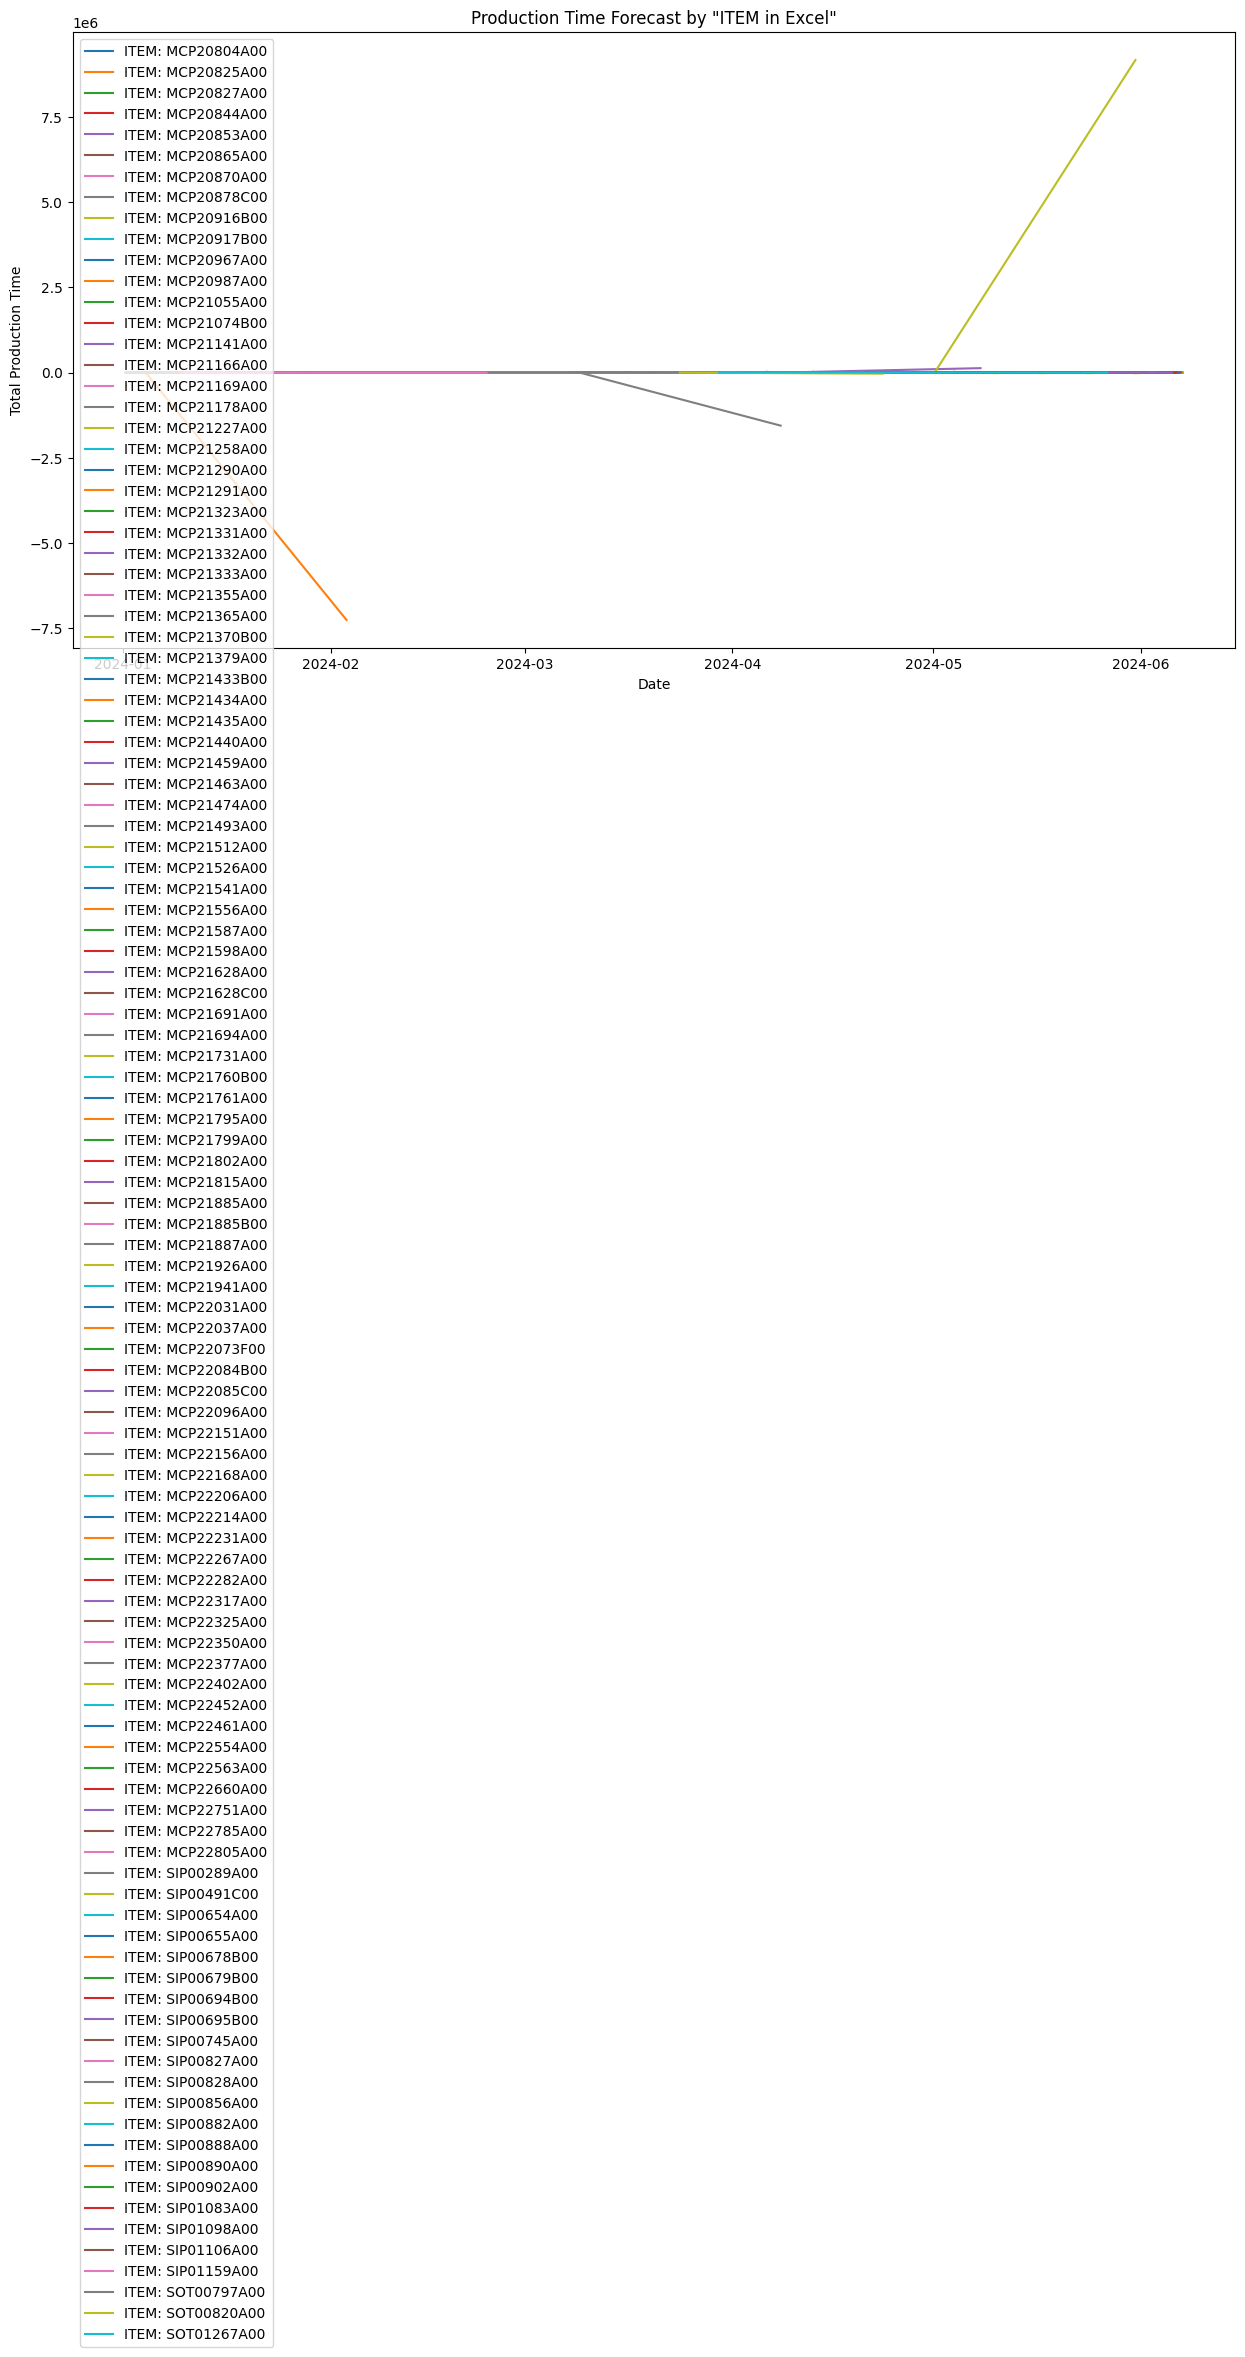

In [27]:
# 일별, ITEM별 생산 소요 시간 그래프 그리기
# ITEM들이 너무 많아서 그래프 그리기가 힘듦. 추후 생각
plt.figure(figsize=(15, 8))

for item, forecast in forecasts.items():
    plt.plot(forecast['ds'], forecast['yhat'], label=f'ITEM_CODE: {item}')

plt.title('Production Time Forecast by "ITEM in Excel"')
plt.xlabel('Date')
plt.ylabel('Total Production Time')
plt.legend()
plt.show()